In [80]:
import os
import json
import pandas as pd
from pathlib import Path
import numpy as np

In [49]:
root_dir = Path('/h/suo/dev/tree-search-planning/muzero-general/out')

In [59]:
evaluations = []
for env in os.listdir(root_dir):
    for model in os.listdir(root_dir / env):
        for run in os.listdir(root_dir / env / model):
            try:
                stats_json = next((root_dir / env / model / run).glob('*.stats.json'))
                evaluations.append([env, model, run, stats_json])
            except:
                pass

In [67]:
evaluations_df = pd.DataFrame(evaluations, columns=['env', 'model', 'run', 'stats_json'])
evaluations_df.head()

,env,model,run,stats_json
0,HighwayEnv,MCTSAgent,run_20210316-153909_25172,/h/suo/dev/tree-search-planning/muzero-general...
1,HighwayEnv,MCTSAgent,run_20210316-152933_22463,/h/suo/dev/tree-search-planning/muzero-general...
2,HighwayEnv,DQNAgent,run_20210316-145415_10891,/h/suo/dev/tree-search-planning/muzero-general...
3,HighwayEnv,DQNAgent,run_20210316-145336_10605,/h/suo/dev/tree-search-planning/muzero-general...
4,HighwayEnv,DQNAgent,run_20210316-181851_10244,/h/suo/dev/tree-search-planning/muzero-general...


In [105]:
def get_stats(stats_json):
    with open(stats_json) as f:
        stats = json.load(f)
    return stats

In [108]:
evaluations_df['stats_dict'] = evaluations_df['stats_json'].apply(get_stats)
evaluations_df.head()

,env,model,run,stats_json,stats,mean_episode_length,mean_episode_reward,stats_dict
0,HighwayEnv,MCTSAgent,run_20210316-153909_25172,/h/suo/dev/tree-search-planning/muzero-general...,"{'initial_reset_timestamp': 1615923549.457805,...",9.2,6.944165,"{'initial_reset_timestamp': 1615923549.457805,..."
1,HighwayEnv,MCTSAgent,run_20210316-152933_22463,/h/suo/dev/tree-search-planning/muzero-general...,"{'initial_reset_timestamp': 1615922973.937414,...",9.2,6.944165,"{'initial_reset_timestamp': 1615922973.937414,..."
2,HighwayEnv,DQNAgent,run_20210316-145415_10891,/h/suo/dev/tree-search-planning/muzero-general...,"{'initial_reset_timestamp': 1615920855.878575,...",9.2,6.944165,"{'initial_reset_timestamp': 1615920855.878575,..."
3,HighwayEnv,DQNAgent,run_20210316-145336_10605,/h/suo/dev/tree-search-planning/muzero-general...,"{'initial_reset_timestamp': None, 'timestamps'...",9.2,6.944165,"{'initial_reset_timestamp': None, 'timestamps'..."
4,HighwayEnv,DQNAgent,run_20210316-181851_10244,/h/suo/dev/tree-search-planning/muzero-general...,{'initial_reset_timestamp': 1615933131.5385494...,9.2,6.944165,{'initial_reset_timestamp': 1615933131.5385494...


In [111]:
def mean_episode_length(stat_dict):
    return np.mean(stat_dict['episode_lengths'])
def mean_total_reward(stat_dict):
    return np.mean(stat_dict['episode_rewards'])

In [112]:
evaluations_df['mean_episode_length'] = evaluations_df['stats_dict'].apply(mean_episode_length)
evaluations_df['mean_episode_reward'] = evaluations_df['stats_dict'].apply(mean_total_reward)

<AxesSubplot:xlabel='model'>

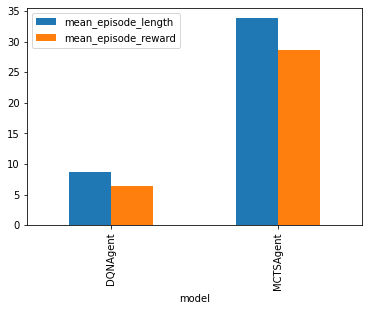

In [126]:
evaluations_df[evaluations_df['env'] == 'HighwayEnv'].groupby('model').mean().plot.bar()